<a href="https://colab.research.google.com/github/Jsgithubchannel/AIFFEL_quest_cr/blob/main/%08DLwithPython/CH3_%EC%BC%80%EB%9D%BC%EC%8A%A4%EC%99%80_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3-1 모두 1 또는 0인 텐서
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

y = tf.zeros(shape=(2,1))
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
# 3-2 랜덤텐서
x = tf.random.normal(shape=(3,1), mean=0, stddev=1) # 평균이 0이고 표준 편차가 1인 정규 분포에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

y = tf.random.uniform(shape=(3,1), minval=0, maxval=1) # 0~1 사이의 균등 분포에서 뽑은 랜덤한 값으로 만든 텐서
print(y)

tf.Tensor(
[[-1.2983096 ]
 [-1.3081297 ]
 [-0.53806186]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.18311608]
 [0.3628509 ]
 [0.9710934 ]], shape=(3, 1), dtype=float32)


In [ ]:
# 3-4 텐서플로 텐서에 값을 할당하지 못함
# x = tf.ones(shape=(2,2))
# x[0,0]=0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
# 5,6,7 텐서플로 변수 만들기, 변수에 값 할당하기, 일부에 값 할당하기
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)
v.assign(tf.ones((3,1)))
print(v)
v[0,0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3865978],
       [-0.6758245],
       [-0.2386616]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
# 8 assign_add()
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
#9 기본적인 수학 연산
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

print(a,b,c)
print()
print(d,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
# 10 GradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
# 11 GradientTape 상수 텐서 입력
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
# 12 Gradient Tape 중첩하여 이계도 그레이디언트 계산
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

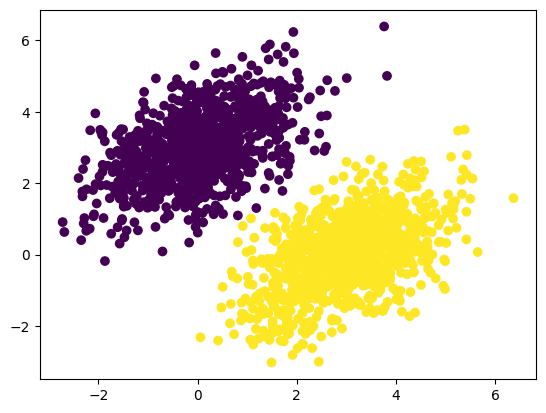

In [ ]:
# 텐서플로 선형 분류기
import numpy as np

# 2D 평면에 두 클래스의 랜덤한 포인트 생성
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

# 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# (0과 1로 구성된) 타깃 생성
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

# 두 클래스의 포인트를 그래프로 그리기
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

0번째 스텝의 손실: 3.9772
1번째 스텝의 손실: 0.5788
2번째 스텝의 손실: 0.1938
3번째 스텝의 손실: 0.1388
4번째 스텝의 손실: 0.1241
5번째 스텝의 손실: 0.1149
6번째 스텝의 손실: 0.1070
7번째 스텝의 손실: 0.0999
8번째 스텝의 손실: 0.0934
9번째 스텝의 손실: 0.0875
10번째 스텝의 손실: 0.0820
11번째 스텝의 손실: 0.0771
12번째 스텝의 손실: 0.0726
13번째 스텝의 손실: 0.0684
14번째 스텝의 손실: 0.0647
15번째 스텝의 손실: 0.0612
16번째 스텝의 손실: 0.0581
17번째 스텝의 손실: 0.0552
18번째 스텝의 손실: 0.0526
19번째 스텝의 손실: 0.0502
20번째 스텝의 손실: 0.0480
21번째 스텝의 손실: 0.0461
22번째 스텝의 손실: 0.0442
23번째 스텝의 손실: 0.0426
24번째 스텝의 손실: 0.0411
25번째 스텝의 손실: 0.0397
26번째 스텝의 손실: 0.0384
27번째 스텝의 손실: 0.0373
28번째 스텝의 손실: 0.0362
29번째 스텝의 손실: 0.0353
30번째 스텝의 손실: 0.0344
31번째 스텝의 손실: 0.0336
32번째 스텝의 손실: 0.0328
33번째 스텝의 손실: 0.0322
34번째 스텝의 손실: 0.0316
35번째 스텝의 손실: 0.0310
36번째 스텝의 손실: 0.0305
37번째 스텝의 손실: 0.0300
38번째 스텝의 손실: 0.0296
39번째 스텝의 손실: 0.0292


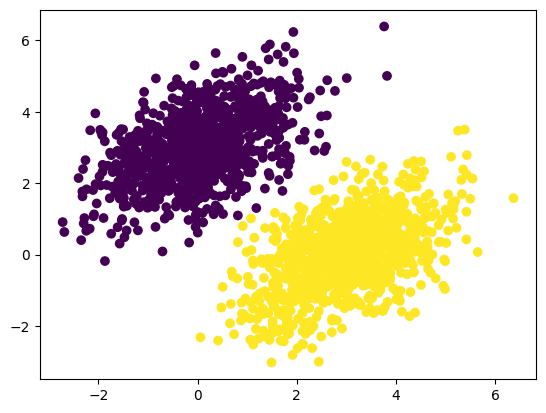

In [ ]:
# 선형 분류기 변수 만들기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 정방향 패스 함수
def model(inputs):
  return tf.matmul(inputs, W) + b

# 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

# 배치 훈련 루프
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0] > 0.5)
plt.show()